In [75]:
import pandas as pd
import numpy as np
import statsmodels.stats.inter_rater as inter
# 
df1=pd.read_csv("./survey1/abram_answers.csv")
df2=pd.read_csv("./survey1/amir_answers.csv")
df3=pd.read_csv("./survey1/computer_answers.csv")
df3.columns

Index(['name', 'fc', 'fc_cat', 'cnn_cat', 'env_and_freq_cat', 'average_cat',
       'stack_size', 'iteration_num'],
      dtype='object')

In [76]:
df1=df1[["name","drum_category"]]
df2=df2[["name","drum_category"]]
#check to see if they're sorted the same way
print(np.sum(df1["name"]==df2["name"]),
      np.sum(df3["name"]==df2["name"]),
      np.sum(df3["name"]==df2["name"]))
df=pd.DataFrame()
df["name"]=df1["name"].copy()

df["abram"]=df1["drum_category"]
df["amir"]=df2["drum_category"]
df["c1"]=df3["average_cat"]
df["c2"]=df3["cnn_cat"]
df["c3"]=df3["env_and_freq_cat"]
df["c4"]=df3["fc_cat"]

257 257 257


In [77]:
df=df.replace("kick","k")
df=df.replace("rim","o")
df=df.replace("snare","s")
df=df.replace("hat","h")
df=df.replace("clap","c")
# df=df.replace("c","s")
print("there are 6 categories and 257 samples the bad category is only for humans")
print("abram agreeing with averaged categorizer",np.sum(df["abram"]==df["c1"]))
print("amir agreeing with averaged categorizer",np.sum(df["amir"]==df["c1"]))
print("abram agreeing with amir",np.sum(df["abram"]==df["amir"]))

print("both  humans agreeing with averaged categorizer",np.sum((df["abram"]==df["amir"]) &
                                        (df["abram"]==df["c1"])))
print("both humans agreeing with cnn categorizer",np.sum((df["abram"]==df["amir"]) &
                                        (df["abram"]==df["c2"])))
print("both humans agreeing with env+freq categorizer",np.sum((df["abram"]==df["amir"]) &
                                        (df["abram"]==df["c3"])))
print("both  humans agreeing with fully connected categorizer",np.sum((df["abram"]==df["amir"]) &
                                        (df["abram"]==df["c4"])))


there are 6 categories and 257 samples the bad category is only for humans
abram agreeing with averaged categorizer 113
amir agreeing with averaged categorizer 121
abram agreeing with amir 122
both  humans agreeing with averaged categorizer 76
both humans agreeing with cnn categorizer 76
both humans agreeing with env+freq categorizer 46
both  humans agreeing with fully connected categorizer 78


In [78]:
#make a 2d array for fleiss kappa
cats=["b","o","h","k","s","c"]
def count_cats(i,r):
    cat_counts=[0]*len(cats)
    for c in r:
        j=cats.index(c)
        cat_counts[j]=cat_counts[j]+1
    M.append(cat_counts) 

M=[]
for i,r in df.iterrows():
    count_cats(i,r[1:])


In [89]:
M=[]
for i,r in df[["name","abram","amir","c1","c3","c2","c4"]].iterrows():
    count_cats(i,r[1:])
print(" kappa of 2 humans and 4 models")
inter.fleiss_kappa(M,method='uniform')

 kappa of 2 humans and 4 models


0.45822222222222236

In [90]:
print("kappa of 2 humans")
M=[]
for i,r in df[["name","abram","amir"]].iterrows():
    count_cats(i,r[1:])
inter.fleiss_kappa(M,method='uniform')

kappa of 2 humans


0.4733333333333334

In [93]:
#dropping bads
# df=df[(df["amir"]!="b") | (df["abram"]!="b")]
# df=df[(df["amir"]!="b") | (df["abram"]!="b")]


In [92]:

print("kappa of 2 humans + cnn or fc")
M=[]
for i,r in df[["name","abram","amir","c2"]].iterrows():
    count_cats(i,r[1:])
print(inter.fleiss_kappa(M,method='uniform'))
M=[]
for i,r in df[["name","abram","amir","c4"]].iterrows():
    count_cats(i,r[1:])
print(inter.fleiss_kappa(M,method='uniform'))
M=[]
for i,r in df[["name","c3","c2","c4"]].iterrows():
    count_cats(i,r[1:])
print(inter.fleiss_kappa(M,method='uniform'))

kappa of 2 humans + cnn or fc
0.48
0.5000000000000001
0.3444444444444445


In [8]:
print("kappa of 2 humans + cnn or fc")
M=[]
for i,r in df[["name","abram","amir","c2"]].iterrows():
    count_cats(i,r[1:])
print(inter.fleiss_kappa(M,method='uniform'))
M=[]
for i,r in df[["name","abram","amir","c4"]].iterrows():
    count_cats(i,r[1:])
print(inter.fleiss_kappa(M,method='uniform'))
M=[]
for i,r in df[["name","c3","c2","c4"]].iterrows():
    count_cats(i,r[1:])
print(inter.fleiss_kappa(M,method='uniform'))

kappa of 2 humans + cnn or fc
0.3540856031128404
0.35719844357976643
0.2840466926070038


In [9]:
#what happens if we delete the bad rows?
df_nb=df[~((df["abram"]=="b") | (df["amir"]=="b")) ]
print(df_nb.shape)
M=[]
for i,r in df_nb.iterrows():
    count_cats(i,r[1:])
print(" kappa of 2 humans and 4 models")
inter.fleiss_kappa(M,method='uniform')

(180, 7)
 kappa of 2 humans and 4 models


0.45822222222222236

In [10]:
print("kappa of 2 humans")
M=[]
for i,r in df_nb[["name","abram","amir"]].iterrows():
    count_cats(i,r[1:])
inter.fleiss_kappa(M,method='uniform')

kappa of 2 humans


0.4733333333333334

In [11]:
print("kappa of 2 humans and fc ")
M=[]
for i,r in df_nb[["name","abram","amir","c4"]].iterrows():
    count_cats(i,r[1:])
inter.fleiss_kappa(M,method='uniform')


kappa of 2 humans and fc 


0.5000000000000001

In [12]:
M=[]
for i,r in df[["name","c3","c2","c4"]].iterrows():
    count_cats(i,r[1:])
print(inter.fleiss_kappa(M,method='uniform'))

0.2840466926070038


In [13]:
models=["abram","amir","c1","c2","c3","c4"]
cats=["b","o","h","k","s","c"]
np.sum(df["c4"]=="k")



102

In [14]:
vdf=pd.DataFrame()
vc4=df["c4"].value_counts()
vc3=df["c3"].value_counts()
vc2=df["c2"].value_counts()


vab=df["abram"].value_counts()
va=df["amir"].value_counts()

In [39]:
#[b,c,h,k,o,s]
# c4=["FC",0,0,42,102,0,113]
def percentage_calc(a):
    name=a[0]
    vals=a[1:]
    s=np.sum(vals)
    percentaged=[v/s*100 for v in vals]
    return [name]+percentaged

c3=percentage_calc(["E+F",0,38,144,0,75])
# c2=["CNN",0,39,60,54,44,60]
c1=percentage_calc(["Ground Truth",0,39,60,54,44,60])
h1=percentage_calc(["Person1",52,16,42,37,33,77]) #amir
h2=percentage_calc(["Person2",46,18,50,62,17,64]) #abram
df["c4"].sort_index().value_counts()

s    113
k    102
h     42
Name: c4, dtype: int64

In [40]:

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
bf=pd.DataFrame(columns=["categorizer","Bad","Clap","Hat","Kick","Other","Snare"],
               data=[h1,h2,c1])
bf=bf.set_index("categorizer")

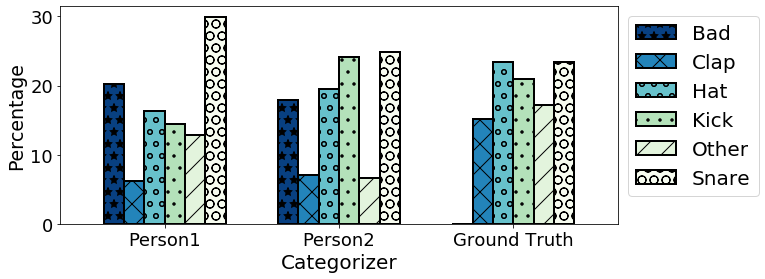

In [43]:
c=cm.get_cmap("GnBu_r",10)
# plt.figure(figsize=(2,1))
ax=bf.plot(kind='bar',rot=0,color=c(np.linspace(0.05,1,6)),linewidth=2, width=0.7)
patterns =('-', '+', 'x','/','//','O','o','\\','\\\\')
bars = ax.patches
hatches = ''.join(h*len(bf) for h in ["*","x","o",".","/","O"])

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    bar.set_edgecolor("black")
    bar.set_linewidth(2)
    
plt.gcf().set_size_inches(10, 4)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left', ncol=1,prop={'size': 20},)
plt.ylabel("Percentage",fontsize=19)
plt.xlabel("Categorizer",fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)
# plt.title("Categorization Proportions",fontsize=19)

plt.savefig("cat_2p.pdf",bbox_inches='tight',dpi=1000)